# Linear Regression

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## Data Exploration

In [2]:
data_boston_housing = datasets.fetch_california_housing()
data_boston_housing.data.shape

description = data_boston_housing.DESCR.split('\n')
description = list(filter(lambda d: len(d) > 0, description)) # we only want non-empty strings in the list
pprint(description)
print(data_boston_housing.data.shape)
print('target_names', data_boston_housing.target_names)
print('feature_names', data_boston_housing.feature_names)
print('first_row', data_boston_housing.data[0])

x = data_boston_housing.data
y  = data_boston_housing.target

print(x, y)

['.. _california_housing_dataset:',
 'California Housing dataset',
 '--------------------------',
 '**Data Set Characteristics:**',
 '    :Number of Instances: 20640',
 '    :Number of Attributes: 8 numeric, predictive attributes and the target',
 '    :Attribute Information:',
 '        - MedInc        median income in block group',
 '        - HouseAge      median house age in block group',
 '        - AveRooms      average number of rooms per household',
 '        - AveBedrms     average number of bedrooms per household',
 '        - Population    block group population',
 '        - AveOccup      average number of household members',
 '        - Latitude      block group latitude',
 '        - Longitude     block group longitude',
 '    :Missing Attribute Values: None',
 'This dataset was obtained from the StatLib repository.',
 'https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html',
 'The target variable is the median house value for California districts,',
 'expressed in 

Let's quickly visualize the features.

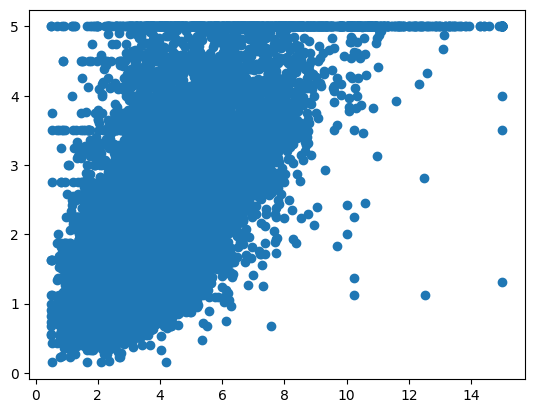

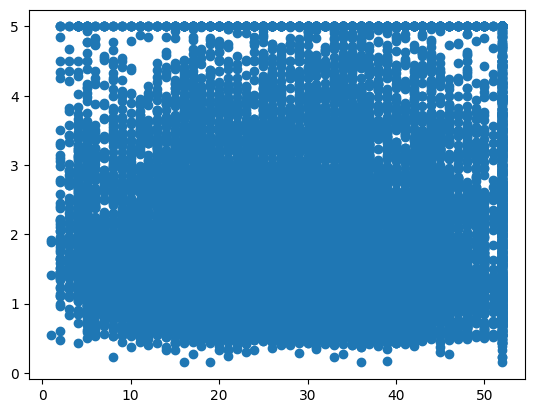

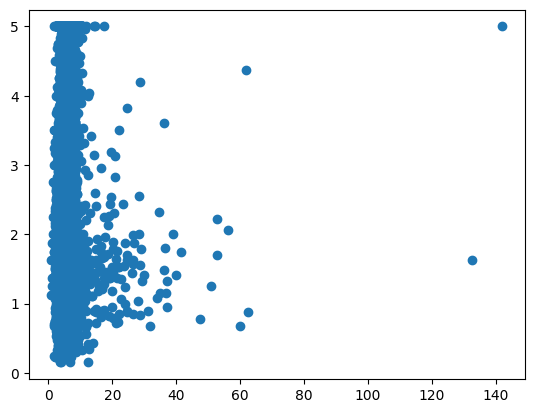

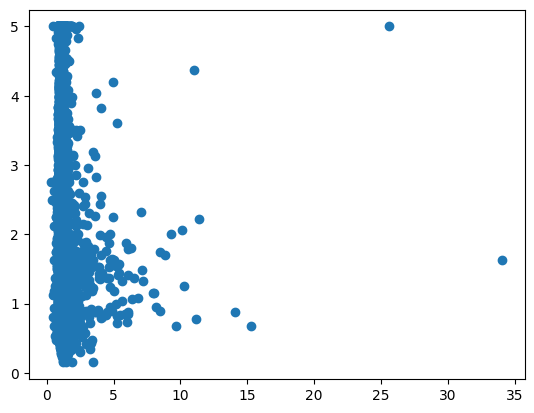

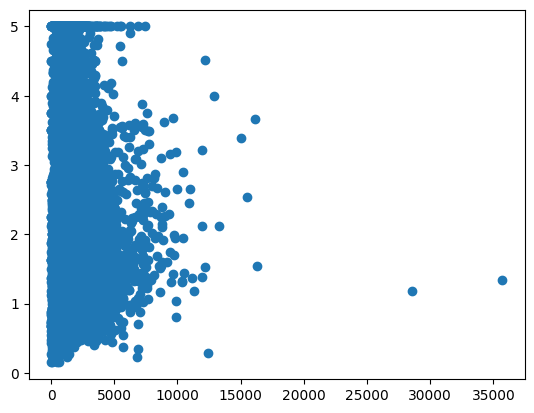

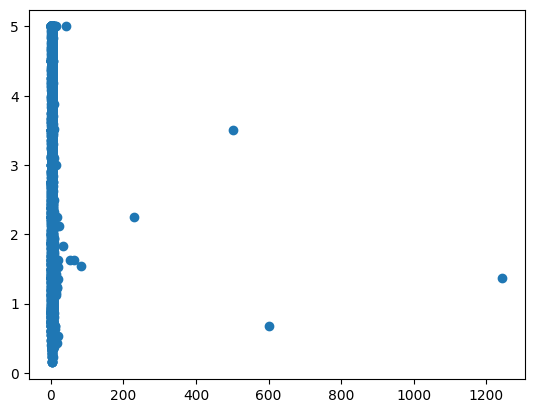

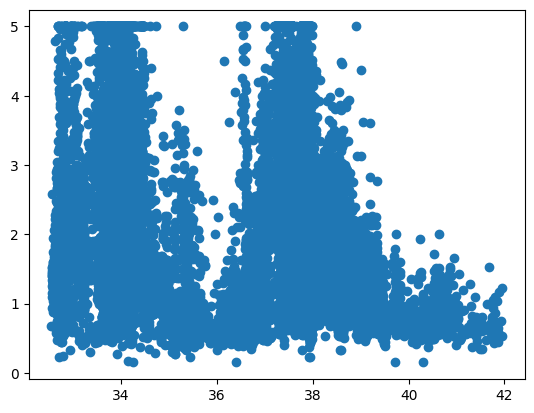

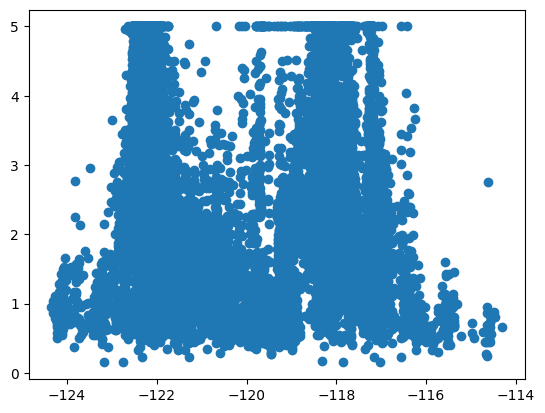

In [3]:
for i in range(x.shape[1]):
    plt.scatter(x[:, i], y)
    plt.show()

## Setup and Train Model

$$
f(x; w,b) = w^T x + b
$$

Let's try to fit a vanilla linear regression model

In [4]:
lr = LinearRegression(
    fit_intercept=True, # since our data is not centered, we will probably need to have an intercept
    normalize=False, # not normalizing on the first try
    positive=False, # not forcing coefficients to be positive
    copy_X=True, # to ensure original input data is not overwritten
)
fitted_lr = lr.fit(x, y)

/Users/henry/Git/ml-algorithms/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


We want to check the $R^2$ coefficient of determination of the prediction, where $R^2 = 1 - \frac{\text{residual sum of squares} }{\text{total sum of squares}}$

In [5]:
r_squared = fitted_lr.score(x, y)
print(r_squared)



0.606232685199805


Let's try to predict using the learned model coefficients.

In [6]:
from random import randint


for i in range(3):
    idx = randint(0, len(x))
    y_pred = fitted_lr.predict(x[idx].reshape(1, -1))
    print(f'Prediction {i}')
    pprint(list(zip(data_boston_housing.feature_names, x[idx])))
    print(f'y={y[idx]}, y_pred={y_pred[0]}')

Prediction 0
[('MedInc', 6.2236),
 ('HouseAge', 32.0),
 ('AveRooms', 6.488789237668161),
 ('AveBedrms', 0.9573991031390134),
 ('Population', 1151.0),
 ('AveOccup', 2.5807174887892375),
 ('Latitude', 34.16),
 ('Longitude', -117.27)]
y=1.597, y_pred=2.548004331638083
Prediction 1
[('MedInc', 1.59),
 ('HouseAge', 49.0),
 ('AveRooms', 4.39186295503212),
 ('AveBedrms', 1.0706638115631693),
 ('Population', 1525.0),
 ('AveOccup', 3.2655246252676657),
 ('Latitude', 37.63),
 ('Longitude', -121.0)]
y=0.809, y_pred=1.1377552959671107
Prediction 2
[('MedInc', 4.2383),
 ('HouseAge', 18.0),
 ('AveRooms', 7.572438162544169),
 ('AveBedrms', 1.0565371024734982),
 ('Population', 828.0),
 ('AveOccup', 2.9257950530035335),
 ('Latitude', 33.17),
 ('Longitude', -117.32)]
y=2.39, y_pred=1.9353919961917896


## Feature Importance

Let's check the coefficients of the linear regression model.
Each coefficient means the feature importance $x$ with respect to the independent variable $y$

In [7]:
pprint(list(zip(data_boston_housing.feature_names, fitted_lr.coef_)))

[('MedInc', 0.4366932931343245),
 ('HouseAge', 0.009435778033237972),
 ('AveRooms', -0.10732204139090447),
 ('AveBedrms', 0.645065693519812),
 ('Population', -3.976389421211576e-06),
 ('AveOccup', -0.003786542654971),
 ('Latitude', -0.42131437752714385),
 ('Longitude', -0.43451375467477743)]


## Second Attempt (Excluding "Population" Feature)

We can see the "population" feature isn't that important.
Let's see how the prediction looks like after excluding it.

/Users/henry/Git/ml-algorithms/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


   MedInc  HouseAge  AveRooms  AveBedrms  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127    1.02381  2.555556     37.88    -122.23
0.6062193051855559


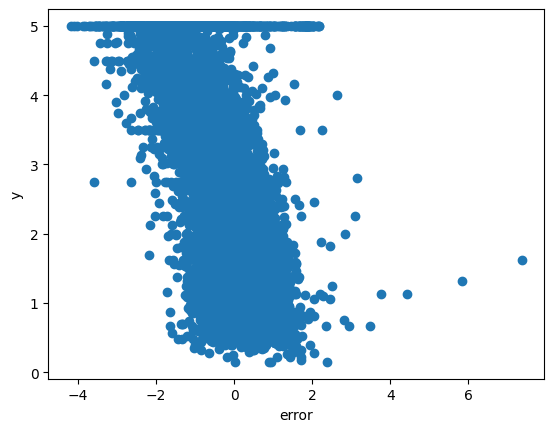

avg errors 5.2794977691942325e-15
[('MedInc', 0.43675974780362403),
 ('HouseAge', 0.009555467799549792),
 ('AveRooms', -0.10713405779069167),
 ('AveBedrms', 0.6449021952418097),
 ('Population', -0.0038193279128491972),
 ('AveOccup', -0.42069941655554943),
 ('Latitude', -0.4340421535595173)]


In [8]:
lr = LinearRegression(
    fit_intercept=True, # since our data is not centered, we will probably need to have an intercept
    normalize=False, # not normalizing on the first try
    positive=False, # not forcing coefficients to be positive
    copy_X=True, # to ensure original input data is not overwritten
)
x_without_population = pd.DataFrame(x, columns=data_boston_housing.feature_names)
x_without_population.drop('Population', axis=1, inplace=True)
print(x_without_population.head(1))
fitted_lr_without_population = lr.fit(x_without_population, y)
r_squared = fitted_lr_without_population.score(x_without_population, y)
print(r_squared)

y_hat = fitted_lr_without_population.predict(x_without_population)
errors = y_hat - y
plt.xlabel('error')
plt.ylabel('y')
plt.scatter(errors, y)
plt.show()
print('avg errors', errors.mean())
pprint(list(zip(data_boston_housing.feature_names, fitted_lr_without_population.coef_)))

There are 4 assumptions for linear regression model.
1. Linear relationship between independent variable ($x$) and target variable ($y$)
2. **Additivity** means that the effect of changes in one of the features on the target variable does not depend on values of other features.
3. Features should not be correlated (no **collinearity**) since it can be difficult to separate out the individual effects of collinear features on the target variable.
4. Independently and identically normally distributed (iid).
  - Otherwise some features will have more influence on the target variable than to others. 
  - Error is constant along the values of the dependent variable - [[homoscedasticity]]. For example, in case of time series, seasonal patterns can increase errors in seasons with higher activity. The below example shows non-constant errors, with more errors on the higher end than the lower end. If that's the case, you probably don't want to do linear regression on this dataset yet. You may want to do some work on your input data: maybe you have some variables to add or remove. If this assumption still cannot be achieved, you can switch to [[#Weighted Linear Regression]] model.

Let's quickly check the correlation between features.
In particular, we will be using the Pearson's correlation coefficient.
```
E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[:, i]) * std(y))
```

In [9]:
pd.DataFrame(x, columns=data_boston_housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


/var/folders/m2/8936fkv54pxbvdyy2wq30dqh0000gn/T/ipykernel_9870/1261732307.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_boston_housing.feature_names)
/var/folders/m2/8936fkv54pxbvdyy2wq30dqh0000gn/T/ipykernel_9870/1261732307.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_boston_housing.feature_names)


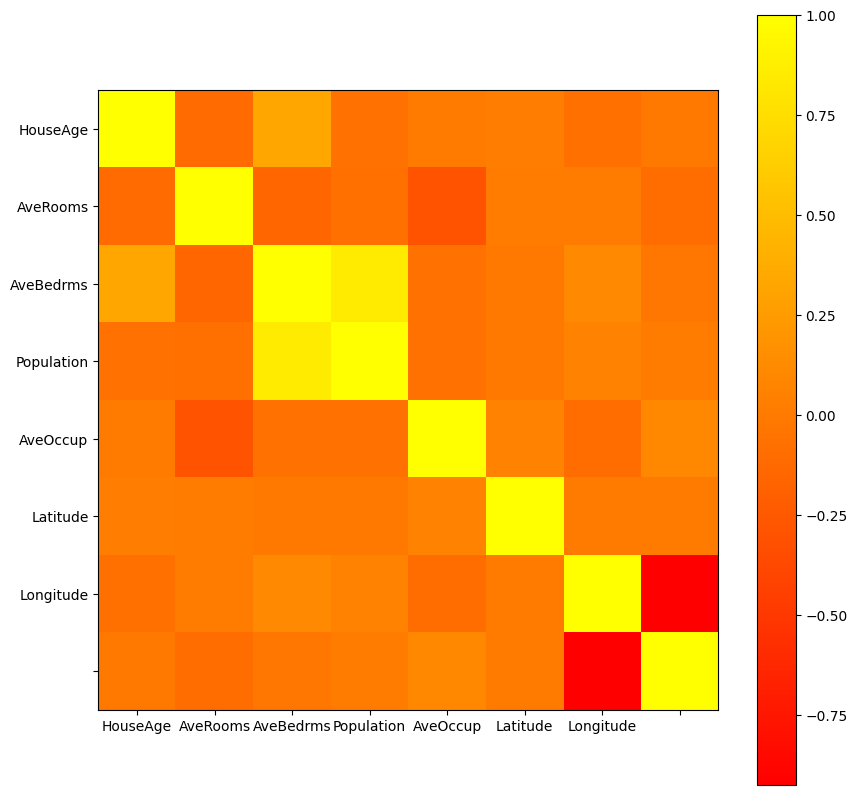

In [10]:
from sklearn.feature_selection import r_regression

x_corr_matrix = pd.DataFrame(x, columns=data_boston_housing.feature_names).corr()
x_corr_matrix

fig, ax = plt.subplots(1,1)
img = ax.imshow(x_corr_matrix, cmap='autumn')

ax.set_xticklabels(data_boston_housing.feature_names)
ax.set_yticklabels(data_boston_housing.feature_names)

fig.set_size_inches(10, 10)
fig.colorbar(img)

Next, let's check the distribution of errors with respect to Y

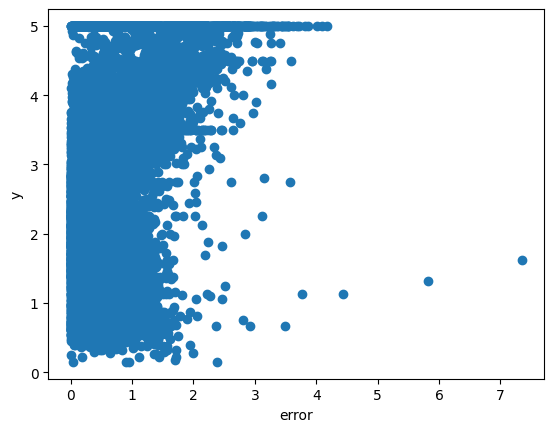

avg errors 0.5311643817546476
RMSE 0.7241001216576387


In [45]:
y_hat = fitted_lr.predict(x)
errors = abs(y_hat - y)
plt.xlabel('error')
plt.ylabel('y')
plt.scatter(errors, y)
plt.show()
print('avg errors', errors.mean())
rsme = np.sqrt(((y_hat - y)**2).mean())
print('RMSE', rsme)

## Weighted Linear Regression

In this variant of linear regression, we will use the variance of observations as additional information to guide our regression prediction. More specifically:

$$
\hat{w} = (X^T C^{-1} X)^{-1} X^T C^{-1} y
$$

where $w$ is the weights of observations, and $c$ is the covariance of observations.

In [34]:
x_sampled = x[:3000]
y_sampled = y[:3000]
residuals = y_sampled - fitted_lr.predict(x_sampled)
covar = np.diag(residuals ** 2)
print(covar.shape)

weights = np.linalg.inv(x_sampled.T @ np.linalg.inv(covar) @ x_sampled) @ (x_sampled.T @ np.linalg.inv(covar) @ y_sampled)
print(weights.shape)

y_hat_sampled = x_sampled @ weights
rsme = np.sqrt(((y_hat_sampled - y_sampled)**2).mean())
print('RMSE', rsme)

(3000, 3000)
(8,)
RMSE 0.8976166598624791


## Next Steps

To motivate for non-linear models, we will use a vanilla parametric non-linear model to train the same dataset

In [64]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

mlp_r = MLPRegressor(
    hidden_layer_sizes=(128, 128, 64, 32, 16, 8),
    activation='relu',
    solver='adam',
    alpha=1e-4, # l2 regularization strength
    learning_rate='adaptive',
    learning_rate_init=1e-5,
    shuffle=True,
    max_iter=1000,
    verbose=True,
)

sc = StandardScaler()
scaler = sc.fit(x)
x_scaled = scaler.transform(x)

fitted_mlp_r = mlp_r.fit(x_scaled, y)

Iteration 1, loss = 2.63498046
Iteration 2, loss = 2.48354366
Iteration 3, loss = 2.26234536
Iteration 4, loss = 2.01126879
Iteration 5, loss = 1.76796602
Iteration 6, loss = 1.53584960
Iteration 7, loss = 1.30358468
Iteration 8, loss = 1.09151610
Iteration 9, loss = 0.91793341
Iteration 10, loss = 0.79217216
Iteration 11, loss = 0.70146106
Iteration 12, loss = 0.63557384
Iteration 13, loss = 0.58303860
Iteration 14, loss = 0.54039062
Iteration 15, loss = 0.50386637
Iteration 16, loss = 0.47238639
Iteration 17, loss = 0.44506477
Iteration 18, loss = 0.42153649
Iteration 19, loss = 0.40080118
Iteration 20, loss = 0.38263196
Iteration 21, loss = 0.36661078
Iteration 22, loss = 0.35269414
Iteration 23, loss = 0.34047312
Iteration 24, loss = 0.32972143
Iteration 25, loss = 0.32033137
Iteration 26, loss = 0.31211429
Iteration 27, loss = 0.30490652
Iteration 28, loss = 0.29864268
Iteration 29, loss = 0.29303740
Iteration 30, loss = 0.28774174
Iteration 31, loss = 0.28287551
Iteration 32, los

0.8073409144875172


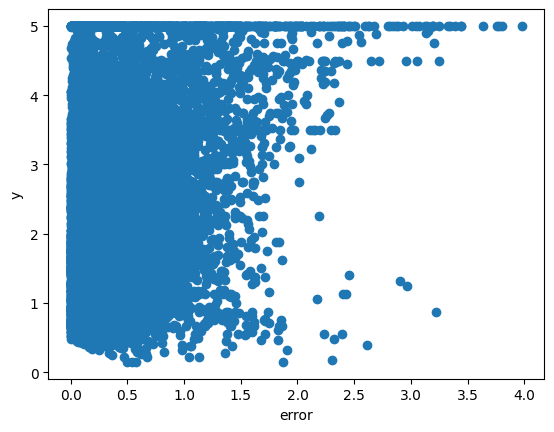

avg errors 0.34642385637840456
RMSE 0.506493102744384


In [65]:
r_squared = fitted_mlp_r.score(x_scaled, y)
print(r_squared)

y_hat = fitted_mlp_r.predict(x_scaled)
errors = abs(y_hat - y)
plt.xlabel('error')
plt.ylabel('y')
plt.scatter(errors, y)
plt.show()
print('avg errors', errors.mean())
rsme = np.sqrt(((y_hat - y)**2).mean())
print('RMSE', rsme)

0.5986209683342416


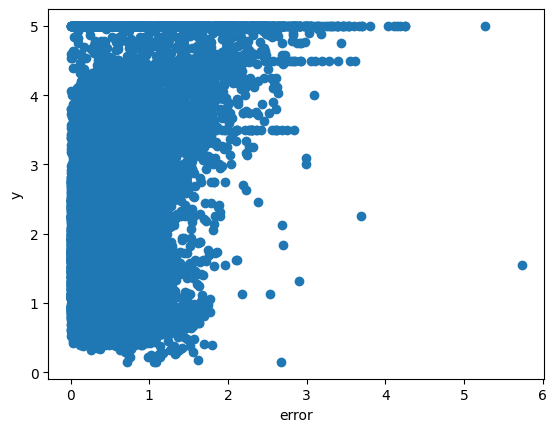

avg errors 0.5333008196653621
RMSE 0.7310652296895852


In [63]:
r_squared = fitted_mlp_r.score(x, y)
print(r_squared)

y_hat = fitted_mlp_r.predict(x)
errors = abs(y_hat - y)
plt.xlabel('error')
plt.ylabel('y')
plt.scatter(errors, y)
plt.show()
print('avg errors', errors.mean())
rsme = np.sqrt(((y_hat - y)**2).mean())
print('RMSE', rsme)